# [Census-Income (KDD) Data Set](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29?fbclid=IwAR33gBAA7qDGXZuVj8Fye0SUnOXItybE2hy_4eCIUjYU3lHBwdIBFRdnSKI)
## Spis powszechny ludności Stanów Zjednoczonych w latach 1994-1995


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [121]:
columns = lineList = [line.rstrip('\n') for line in open('data/census-income.names')]
data = pd.read_csv('data/census-income.data', sep = ',', header=None, index_col=False, names=columns)

In [122]:
pandas_profiling.ProfileReport(data)

Number of variables,42
Number of observations,199523
Total Missing (%),0.0%
Total size in memory,63.9 MiB
Average record size in memory,336.0 B
Numeric,12
Categorical,29
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Próbka danych (head)

In [123]:
data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Statystyczny (podstawowy) opis danych

In [124]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199523.0,34.494199,22.310895,0.00,15.000,33.00,50.00,90.0
detailed industry recode,199523.0,15.352320,18.067129,0.00,0.000,0.00,33.00,51.0
detailed occupation recode,199523.0,11.306556,14.454204,0.00,0.000,0.00,26.00,46.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
instance weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
own business or self employed,199523.0,0.175438,0.553694,0.00,0.000,0.00,0.00,2.0


## Wiek badanych osób

<Figure size 3000x1500 with 0 Axes>

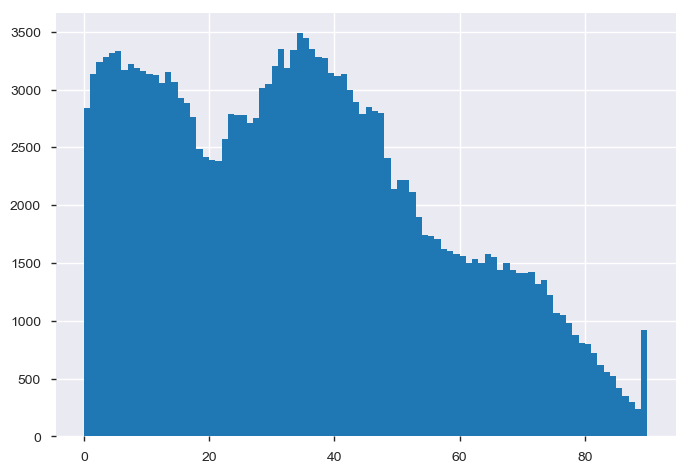

<Figure size 3000x1500 with 0 Axes>

In [125]:
data['age'].hist(bins=90)
plt.figure(figsize=(30,15))

Jak widać, badana grupa to społeczeństwo progresywne - jest mniej osób starszych niż młodszych.  
Da się również zauważyć dwa wyraźnie wyże demogradiczne oddzielone od siebie o około 20 lat.

In [126]:
pd.DataFrame(data['age'].describe()[['mean','50%','min','max']].round(2))

,age
mean,34.49
50%,33.00
min,0.00
max,90.00


Najmłodsza badana osoba nie ma nawet roku, a najstarsza ma 90 lat.

## Wiek, a zatrudnienie badanych osób

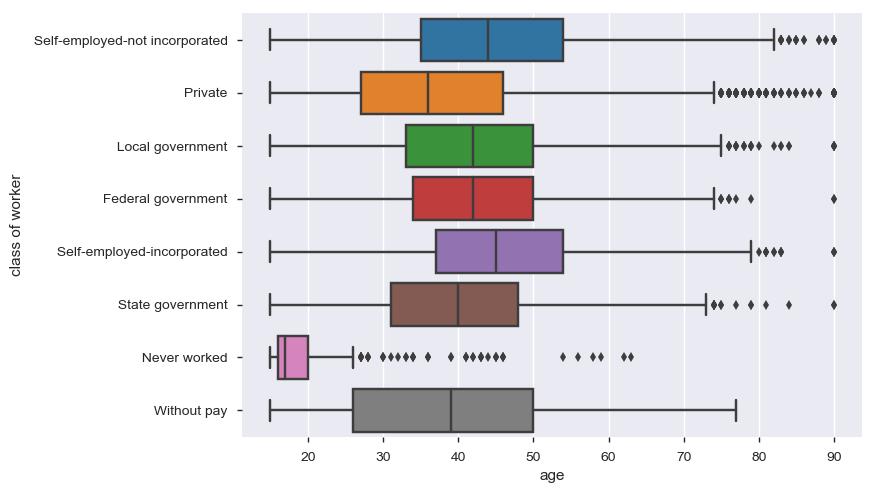

In [127]:
sns.boxplot(x = "age", y = "class of worker", data = data[~data['class of worker'].str.contains('Not in universe')])

Samozatrudnienie preferowane jest przez osoby starsze.  
Większość pracowników rządowych jest w podobnym wieku (średnio około 40. roku życia). Pracownicy rządu stanowego są co do zasady młodsi od pozostałych.  
Aktywizacja zawodowa następuje około 25. roku życia.

## Stawka godzinowa, a pochodzenie badanych osób

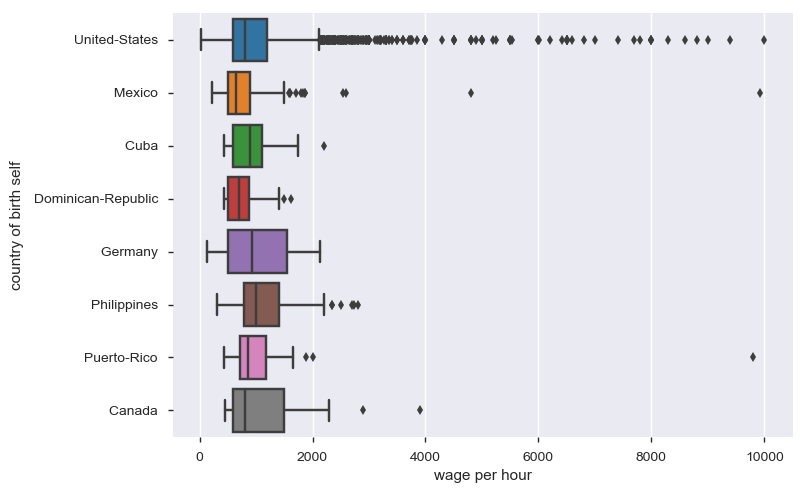

In [128]:
common_countries = data[~data['country of birth self'].str.contains('\?')]
common_countries = common_countries["country of birth self"].value_counts().head(8)
data_common_countries = data[['country of birth self','wage per hour']]
data_common_countries = data_common_countries[data["country of birth self"].isin(common_countries.keys())]
data_common_countries = data_common_countries[data_common_countries["wage per hour"] > 0]

sns.boxplot(x = "wage per hour", y = "country of birth self", data = data_common_countries)

In [129]:
data_common_countries['mean wage per hour'] = data_common_countries['wage per hour']
data_common_countries['min wage per hour'] = data_common_countries['wage per hour']
data_common_countries['max wage per hour'] = data_common_countries['wage per hour']

data_common_countries = data_common_countries.groupby('country of birth self') \
       .agg({'mean wage per hour':'mean', 
             'wage per hour':'median', 
             'min wage per hour': 'min',  
             'max wage per hour': 'max'})
data_common_countries = data_common_countries.sort_values(by=['wage per hour'], ascending=False)
data_common_countries = data_common_countries.rename(index=str, columns={"wage per hour": "median wage per hour"})
data_common_countries

,mean wage per hour,median wage per hour,min wage per hour,max wage per hour
country of birth self,,,,
Philippines,1159.159091,1000,300,2800
Germany,991.461538,920,135,2141
Cuba,970.360000,900,425,2200
Puerto-Rico,1098.600000,855,425,9800
United-States,978.576469,800,20,9999
Canada,1145.517241,798,450,3900
Dominican-Republic,789.823529,700,425,1626
Mexico,790.724014,650,213,9916


## Skąd pochodzą rodzice osób urodzonych w danym kraju?

In [130]:
nonans = data[~data['country of birth self'].str.contains('\?')]
countries_of_birth = nonans['country of birth self'].unique()
countries_of_birth.sort(axis=0)
def showMotherAndFather(country):
    motherAndFather = nonans[nonans['country of birth self'].str.contains(country)]
    motherAndFather = motherAndFather[['country of birth mother', 'country of birth father']]    
    motherAndFather = motherAndFather[(motherAndFather['country of birth mother'] != ' ?') & (motherAndFather['country of birth father'] != ' ?')]
    motherAndFather = motherAndFather.apply(pd.Series.value_counts)
    motherAndFather = motherAndFather.sort_values(['country of birth mother', 'country of birth father'], 
                                                  ascending=[False, False]).head(10).iloc[::-1]
    motherAndFather.plot.barh(logx=True)
    
    
interact(showMotherAndFather, country=countries_of_birth)

interactive(children=(Dropdown(description='country', options=(' Cambodia', ' Canada', ' China', ' Columbia', …

<function __main__.showMotherAndFather(country)>

## ludzie zarabiają dość dobrze i bez studiów

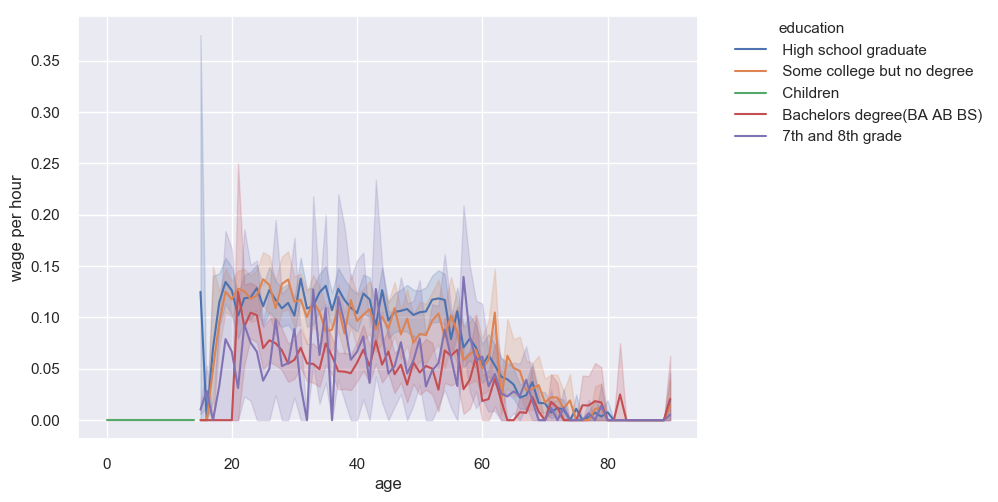

In [131]:
sns.set(style="darkgrid")
popular_educations = data["education"].value_counts().head(5)
data_popular_educations = data[data["education"].isin(popular_educations.keys())]

sns.lineplot(x = data["age"], hue = data_popular_educations["education"], y = data["wage per hour"] > 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Ile danych o konkretnych etapach edukacji mamy?

In [142]:
data["education"].value_counts()

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64

## Absolwenci liceum zarabiają więcej niż inżynierowie lub magistranci.  Magistranci zarabiają mniej niż inżynierowie.


<Figure size 4000x2000 with 0 Axes>

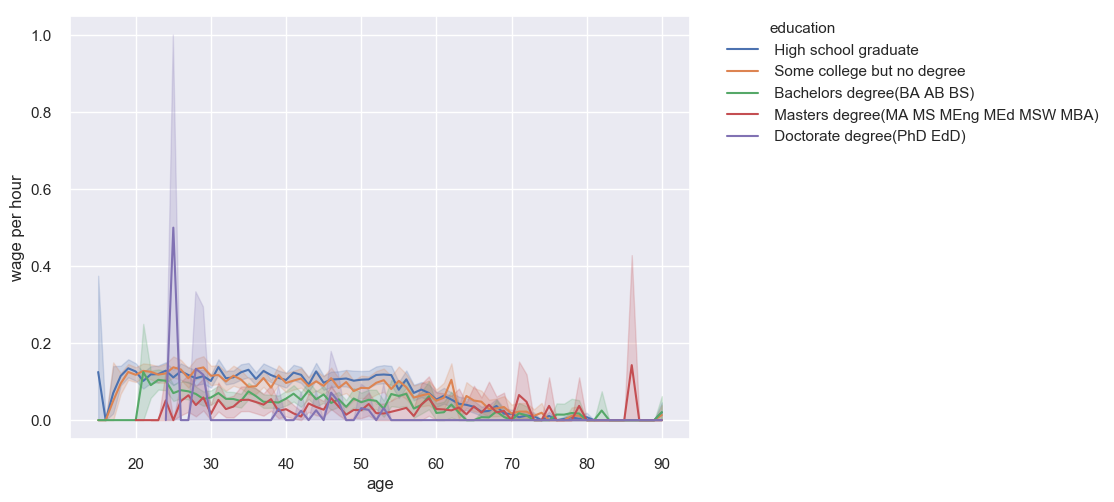

<Figure size 4000x2000 with 0 Axes>

In [134]:
sns.set(style="darkgrid")
data_interesting_educations = data[data["education"].isin([" High school graduate",
                                                           " Bachelors degree(BA AB BS)",
                                                           " Some college but no degree",
                                                           " Masters degree(MA MS MEng MEd MSW MBA)",
                                                           " Doctorate degree(PhD EdD)"])]

sns.lineplot(x = data["age"], hue = data_interesting_educations["education"], y = data["wage per hour"] > 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(40,20))

## ile średnio zarabiał obywatel USA w latach 94/95 ?

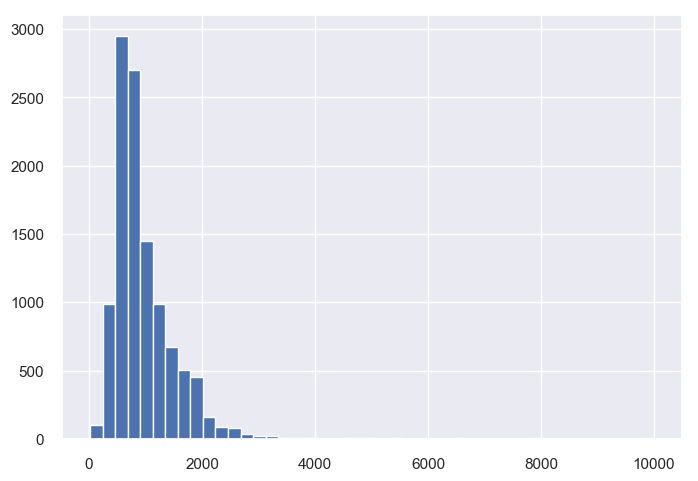

In [135]:
wage_per_hour = data['wage per hour']
wage_per_hour[wage_per_hour>0].hist(bins=45)

## Jak zarobki mają się do wieku?

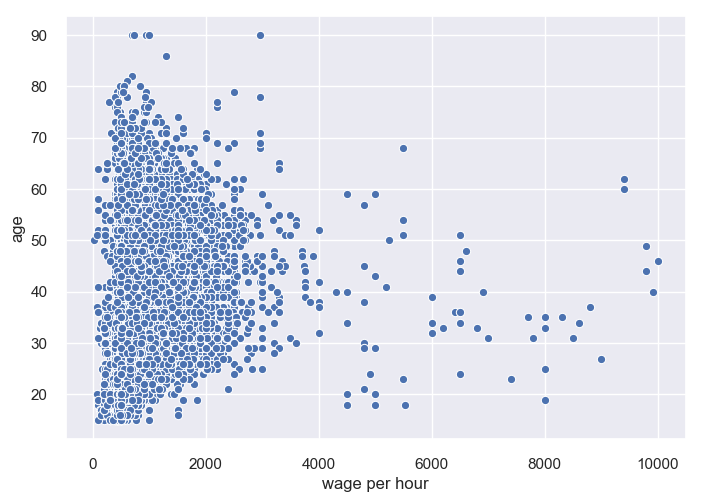

In [136]:
sns.scatterplot(x = wage_per_hour[wage_per_hour>0], y = data["age"])

## a jak zarobki mają się do ilości przepracowanych tygodni?

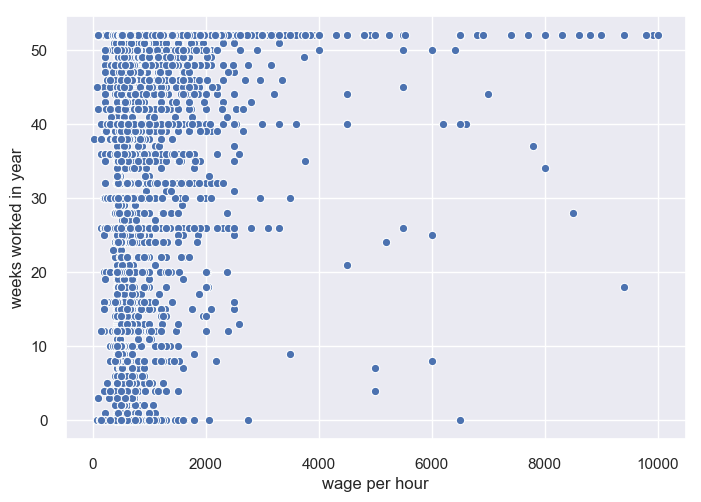

In [137]:
sns.scatterplot(x = wage_per_hour[wage_per_hour>0], y = data["weeks worked in year"])

## Ile zarabiają kobiety, a ile mężczyźni?

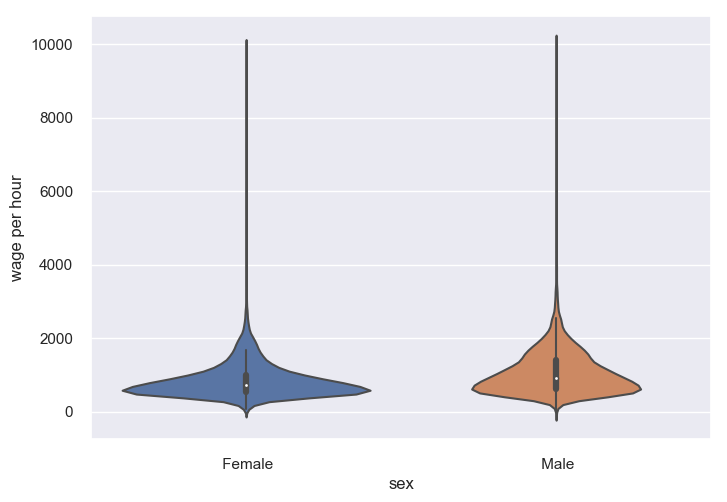

In [138]:
sns.violinplot(y = wage_per_hour[wage_per_hour>0],  x = data["sex"])

## Czy pensja zależy od rasy?

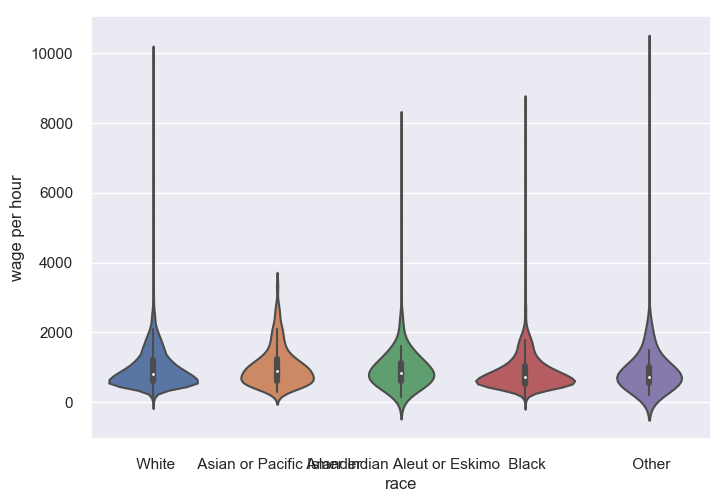

In [139]:
sns.violinplot(y = wage_per_hour[wage_per_hour>0],  x = data["race"])